In [1]:
%run pylib/ml_fit dr4  show dark kde title "Kent's selections from the [_Swift_ unassociated list](https://www.swift.psu.edu/unassociated)"
unid = dfc[dfc.subset=="unid"].copy()

# Kent's selections from the [_Swift_ unassociated list](https://www.swift.psu.edu/unassociated)

<h5 style="text-align:right; margin-right:15px"> 2024-02-13 14:23</h5>

Not applying ML, so no fit to targets to generate prediction model. Instead we compute KDE probability density distributions
for the ML targets, which we then apply to the unid and bcu associations.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c9910c7f0>

### Data selection cut: "0.15<Ep<4 & d>0.2 & variability<25"

subset,blazar,psr,msp,unid
total,2283,140,176,2349
selected,162,128,169,1389
%,7,91,96,59


## Create KDE functions  in lieu of ML training
* Features: ['d', 'log_epeak', 'diffuse'] 
* Targets: dict_keys(['psr', 'msp', 'blazar'])

In [ ]:
def swift_figs(to_check):
    from pylib.fermi_sources import sedplotgrid
    t = self.df.loc[np.isin(self.df.index, to_check,)].iloc[:, [0,1,2,3,7,8,9]]
    not_found = ~np.isin( to_check,self.df.index,)
    if np.any(not_found):
        show(f'Not in 4FGL-DR4: {np.array(to_check)[not_found]}' )
    sedplotgrid(t)
    
    from pylib.skymaps import AITfigure
    plt.style.use('dark_background')
    (AITfigure()
     .scatter(t, s=100*t.d, )
     .apply(lambda ax: ax.set_title('Swift associations'))
     .apply(lambda ax: show(ax))
    );
    show(plt.gcf(), caption='Size is proportional to $d$')
    sns.scatterplot(t, x=np.log10(t.Ep), y='d').set(**epeak_kw());
    show(plt.gcf(),)

---

## Success list of 18

Not in 4FGL-DR4: ['4FGL J1408.9-5845c' '4FGL J0341.9+3153c' '4FGL J1202.9-5717']

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c6d424d60>
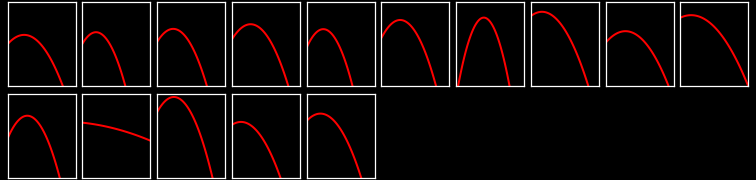

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c955eb100>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c6d5b6d70>
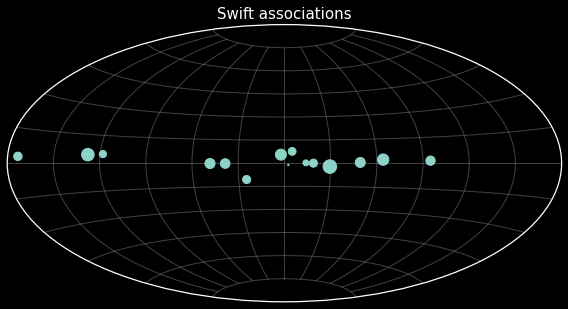

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c955f62f0>
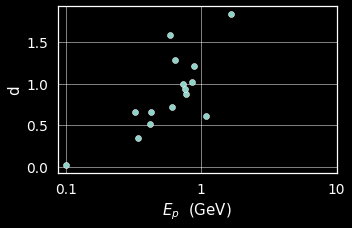

In [11]:
show("""---""")
to_check="""\
4FGL J1616.6-5341
4FGL J1703.6-2850
4FGL J1408.9-5845c
4FGL J1914.6-1157
4FGL J1706.5-4023
4FGL J1743.8-3143
4FGL J0859.3-4342
4FGL J1357.3-6123
4FGL J1729.9-2403
4FGL J1902.2+0448
4FGL J1154.5-5952
4FGL J0540.7+3611
4FGL J1650.9-4420
4FGL J1920.7+1334
4FGL J0341.9+3153c
4FGL J0002.1+6721
4FGL J1202.9-5717
4FGL J0142.5+6650""".split('\n')
show(f"""## Success list of {len(to_check)}""")

swift_figs(to_check)

---

## Kent's "dummy" list of 19

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c7346a6e0>
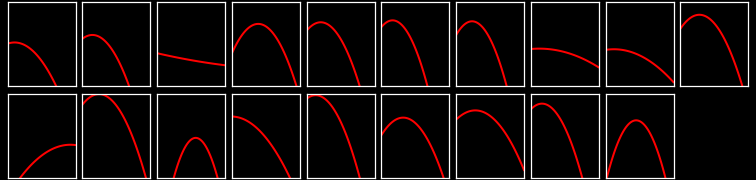

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c94ff6ef0>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c94fa87c0>
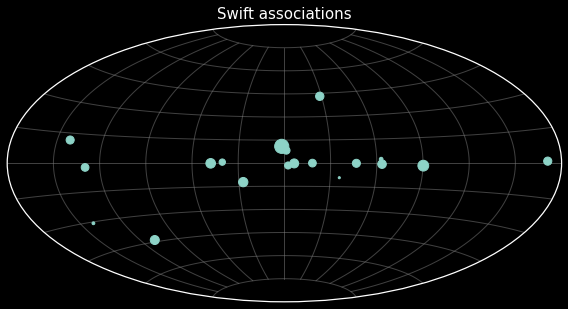

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c735ba9e0>
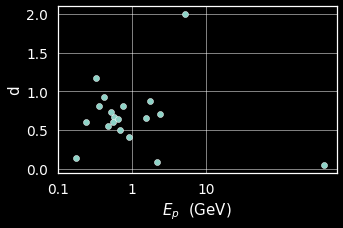

In [5]:
show("""---""")
dummy="""\
4FGL J0009.2+1745
4FGL J0144.3+5959
4FGL J0202.4+2943
4FGL J0418.9+6636
4FGL J0609.0+2136
4FGL J0904.7-4908
4FGL J1155.6-6245
4FGL J1205.1-5951
4FGL J1415.9-1504
4FGL J1418.7-6110
4FGL J1619.8-6314
4FGL J1653.2-4349
4FGL J1709.4-2127
4FGL J1711.4-2526
4FGL J1730.1-3422
4FGL J1745.6-3145
4FGL J1902.5+0654
4FGL J1919.4+1313
4FGL J1924.8-1035""".split('\n')
show(f"""## Kent's "dummy" list of {len(dummy)}""")
swift_figs(dummy)
# show(f"""In data, len {len(data)}: {sum(np.isin(kent,data))} are in.""")
# sns.scatterplot(data.loc[kent], x='Ep', y='d');

---
# Study the Swift Unid  file `files/Swift-set.csv`

### Found 162 sources with a single X-ray source in FOV

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2c956cdf90>
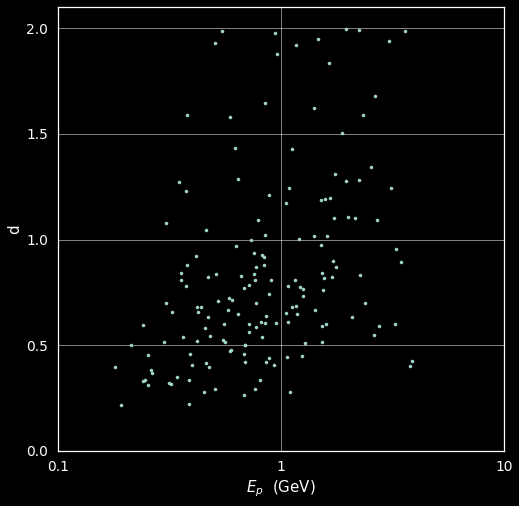

The subset with "d>1.5 & Ep<1" 

,glon,glat,Ep,Fp,d,diffuse
4FGL-DR4,,,,,,
4FGL J0116.8+6914,125.190392,6.481080,0.505756,1.824045,1.931355,0.615
4FGL J0142.5+6650,127.934807,4.459727,0.591277,1.376593,1.580084,0.901
4FGL J0821.5-1436,236.699142,12.420677,0.958593,0.142608,1.880497,-0.190
4FGL J0850.8-4239,263.302216,0.960516,0.381286,17.482949,1.589347,1.011
4FGL J0906.8-2122,248.878647,17.182617,0.546985,4.287823,1.986764,0.079
4FGL J1739.1-1059,14.632079,10.609147,0.846615,1.112170,1.645566,0.722
4FGL J1817.6-3251,359.955231,-7.904714,0.943876,0.605584,1.977972,0.524


In [3]:
show(f"""---
     # Study the Swift Unid  file `{(filename:="files/Swift-set.csv")}`""")
swift = pd.read_csv(filename, index_col=0,skiprows=3, names='ra dec exposure fov_count'.split())

swift_1 = swift.query('fov_count==1')
swu = unid.loc[np.isin( unid.index, swift_1.index,)]

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(swu, ax=ax, x=np.log10(swu.Ep), y='d', s=10)
ax.set(ylim=(0,2.1), yticks=np.arange(0,2.1,0.5), **epeak_kw());

show(f"""### Found {len(swu)} sources with a single X-ray source in FOV
""")
show(fig)

show(f""" The subset with "{(cut:='d>1.5 & Ep<1')}" """)
show((t:=swu.query(cut))['glon glat Ep Fp d diffuse'.split()])

In [4]:
list(t.index)

['4FGL J0116.8+6914',
 '4FGL J0142.5+6650',
 '4FGL J0821.5-1436',
 '4FGL J0850.8-4239',
 '4FGL J0906.8-2122',
 '4FGL J1739.1-1059',
 '4FGL J1817.6-3251']

In [10]:
2349/6787

0.34610284367172534